In [1108]:
from PIL import Image
import numpy as np
import cv2
from scipy import signal as sig
from skimage.io import imread
from skimage.color import rgb2gray
from scipy import ndimage as ndi
from skimage.feature import corner_peaks
import matplotlib.pyplot as plt
from numpy import unravel_index

In [1109]:
''' # 
    # @desc convert image to gray 
    # @params np.array img: Image to be converted to gray
    # @returns np.array gray image
'''
def imgtogray(img):
    img = np.array(img).astype('float64')
    img[:,:,0] *= 0.299
    img[:,:,1] *= 0.587
    img[:,:,2] *= 0.114
    return np.sum(img,axis=2).astype("uint8")

In [1110]:
'''
    # @desc apply Sobel-Edge Detector on a given image
    # @params np.array img: Image to apply Guassian on it
    # @returns np.array Ix_norm: normalized array between (0,255) of edges in x direction of the image
    #          np.array Iy_norm: normalized array between (0,255) of edges in y direction of the image
    #          np.array Ixy_norm: normalized array between (0,255) of edges in x-y direction of the image
'''
def sobel_edge_detector_scipy(img):
    kernel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    Ix = sig.convolve2d(img, kernel_x, mode='same')
    Ix_norm = (Ix * 255 / Ix.max()).astype(np.uint8)
    Iy = sig.convolve2d(img, kernel_y, mode='same')
    Iy_norm = (Iy * 255 / Iy.max()).astype(np.uint8)
    grad = np.sqrt(Ix**2 + Iy**2)
    Ixy_norm = (grad * 255 / grad.max()).astype(np.uint8)
    return Ix_norm, Iy_norm, Ixy_norm

In [1111]:
''' # 
    # @desc apply Gaussian Bluring on a given image
    # @params np.array img: Image to apply Guassian on it
    # @returns np.array I: np.array of blured image
    #          np.array I_norm: normalized array between (0,255) for blured Image 
'''
def gaussian_blur_scipy(img):
    kernel = np.array([[1, 2, 1],[2, 4, 2],[1, 2, 1]])
    I = sig.convolve2d(img, kernel, mode='same')/16.0
    I_norm = (I * 255 / I.max()).astype(np.uint8)
    return I, I_norm

In [1117]:
''' # 
    # @desc apply Harris detrector Algorithm on a given image  
    # @params string img_path: the path of the image to apply Harris on it
    #        float alpha: the constant multiply with trace matrix between (0.04, 0.06)
    #        int threshold: to eliminate edges and flat regions
    # @returns image img_for_corners: original image with red points on it for corners
    #         np.array harris_for_corners: array for corners locations 
'''
def harris_detection(img_path="Test_cow.jpg.png",alpha=0.04,threshold=200):
    img = Image.open(img_path)
    img = img.convert('RGB')
    img_gray = imgtogray(img)
    Ix,Iy,Ixy = sobel_edge_detector_scipy(img_gray)
    Ixx,_ = gaussian_blur_scipy(Ix**2)
    Ixy,_ = gaussian_blur_scipy(Ix*Iy)
    Iyy,_ = gaussian_blur_scipy(Iy**2)
    detM = Ixx * Iyy - Ixy**2
    trM = Ixx + Ixy
    alpha = alpha
    harris_response = detM - alpha * trM**2
    img_for_corners = np.copy(img)
    harris_for_corners = np.zeros(img_for_corners.shape[:2])
    height = img_for_corners.shape[0]
    width = img_for_corners.shape[1]
    offset = 5
    for x in range(offset, width+1):
        for y in range(offset, height+1):
            max_ind =  np.where(harris_response[y-offset:y,x-offset:x] == harris_response[y-offset:y,x-offset:x].max())
            max_x,max_y = max_ind[0][0], max_ind[1][0]
            if(harris_response[y-offset:y,x-offset:x][max_y,max_x]>threshold):
                img_for_corners[y-offset:y,x-offset:x][max_y,max_x] = [255,0,0]
                harris_for_corners[y-offset:y,x-offset:x][max_y,max_x] = 255
    return img, img_for_corners, harris_for_corners

In [1122]:
img, img_with_corners, corners =harris_detection('box.jpg')

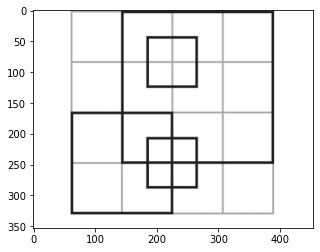

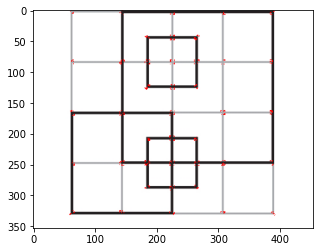

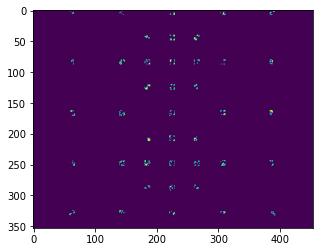

In [1123]:
plt.imshow(img)
plt.show()
plt.imshow(img_with_corners)
plt.show()
plt.imshow(corners)
plt.show()

In [ ]:
2310